## Данные

Данные -  https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps
Необходимо предсказать рейтинг приложения 

In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Поделим фичи на числовые и категориальные


In [3]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [4]:
data = data[cols]
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5


In [5]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [6]:
#распределение категориальных фичей
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

currency DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [7]:
data = data.drop(columns=['currency'])
cat_cols.remove('currency')

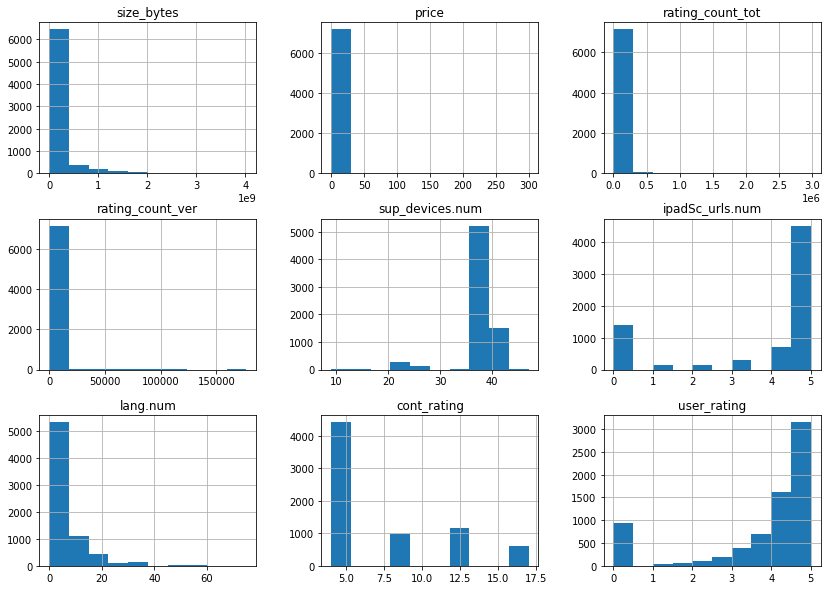

In [8]:
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))
None

А теперь посмотрим на корреляции между фичами

In [9]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-9-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating
size_bytes,1.00,0.18,0.00,0.01,-0.12,0.15,0.00,0.14,0.07
price,0.18,1.00,-0.04,-0.02,-0.12,0.07,-0.01,-0.03,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.01,0.02,0.14,0.01,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.04,0.02,0.01,0.00,0.07
sup_devices.num,-0.12,-0.12,0.01,0.04,1.00,-0.04,-0.04,0.02,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,-0.04,1.00,0.09,-0.11,0.27
lang.num,0.00,-0.01,0.14,0.01,-0.04,0.09,1.00,-0.07,0.17
cont_rating,0.14,-0.03,0.01,0.00,0.02,-0.11,-0.07,1.00,-0.10
user_rating,0.07,0.05,0.08,0.07,-0.04,0.27,0.17,-0.10,1.00


In [10]:
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,user_rating,is_free
0,100788224,3.99,21292,26,38,5,10,4,Games,4.0,False
1,158578688,0.00,161065,26,37,5,23,4,Productivity,4.0,True
2,100524032,0.00,188583,2822,37,5,3,4,Weather,3.5,True
3,128512000,0.00,262241,649,37,5,9,12,Shopping,4.0,True
4,92774400,0.00,985920,5320,37,5,45,4,Reference,4.5,True


In [11]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a

,categorical
0,a
1,b
2,a
3,c


In [12]:
pd.get_dummies(a)

,categorical_a,categorical_b,categorical_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1


In [13]:
# Задание: 
# добавьте в датафрейм колонки для всех категориальных фичей и обновите список категориальных фичей


In [14]:
# TO DO
# жанры
a = data[['prime_genre']]
a = pd.get_dummies(a)
data = data.drop(columns=['prime_genre'])
cat_cols.remove('prime_genre')

data = data.join(a)
cat_cols.extend(list(a.columns))
cat_cols

['is_free',
 'prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather']

In [15]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])
X = pca.transform(data[num_cols + cat_cols])

## Разделение на train/test



In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

## Обучение


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -4.864050023626953
MSE: 1.9823803890924308


In [21]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)

R^2: -1.117828849162608
MSE: 1.9963680555555559


## Cross Validation


In [22]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [23]:
cross_validate(LinearRegression(), X, data[target_col], cv=5, 
               scoring={'r2_score': make_scorer(r2_score), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.01024127, 0.01664519, 0.01572227, 0.01671958, 0.01716447]),
 'score_time': array([0.02826667, 0.00172949, 0.0028019 , 0.0037961 , 0.00186467]),
 'test_r2_score': array([-0.83134309,  0.06613114,  0.11576148,  0.11001651,  0.07118002]),
 'test_mean_squared_error': array([1.66647629, 1.48771837, 1.9403535 , 2.81724991, 2.93166358])}

In [24]:
cross_validate(KNeighborsRegressor(), X, data[target_col], cv=5, 
               scoring={'r2_score': make_scorer(r2_score, ), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.00217462, 0.00114918, 0.00116897, 0.00144863, 0.0011375 ]),
 'score_time': array([0.23335838, 0.2239728 , 0.2370379 , 0.22483969, 0.22121668]),
 'test_r2_score': array([-0.57706574, -0.00693949,  0.02848263,  0.19118207,  0.08476091]),
 'test_mean_squared_error': array([1.43509028, 1.604125  , 2.1318763 , 2.56031967, 2.88879778])}

## GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
gbr_grid_search = GridSearchCV(KNeighborsRegressor(), 
                               [{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
                               cv=5,
                               scoring=make_scorer(mean_squared_error, greater_is_better=False), 
                               verbose=10)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START n_neighbors=1...............................................
[CV 1/5; 1/8] END ...............n_neighbors=1;, score=-3.162 total time=   0.2s
[CV 2/5; 1/8] START n_neighbors=1...............................................
[CV 2/5; 1/8] END ...............n_neighbors=1;, score=-3.414 total time=   0.1s
[CV 3/5; 1/8] START n_neighbors=1...............................................
[CV 3/5; 1/8] END ...............n_neighbors=1;, score=-2.786 total time=   0.1s
[CV 4/5; 1/8] START n_neighbors=1...............................................
[CV 4/5; 1/8] END ...............n_neighbors=1;, score=-3.150 total time=   0.1s
[CV 5/5; 1/8] START n_neighbors=1...............................................
[CV 5/5; 1/8] END ...............n_neighbors=1;, score=-2.925 total time=   0.2s
[CV 1/5; 2/8] START n_neighbors=2...............................................
[CV 1/5; 2/8] END ...............n_neighbors=2;, 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=10)

In [27]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'n_neighbors': 10}
-1.9102379886300558
KNeighborsRegressor(n_neighbors=10)


In [28]:
# Задание: Обучите несколько других моделей и получите лучшие скоры

Вот у нас модель Lasso

In [29]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)

print_metrics(ls.predict(X_test), y_test)

R^2: -16.53357874248401
MSE: 2.0626952011690713


In [30]:
GSCV = GridSearchCV(Lasso(alpha=0.1), 
                        [{'alpha': range(100, 500, 20)}],
                        cv=5,
                        scoring=make_scorer(mean_squared_error, greater_is_better=False)) 

GSCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid=[{'alpha': range(100, 500, 20)}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

Давайте сравним с KNeighbors:

In [31]:
GSCV = GridSearchCV(KNeighborsRegressor(), 
                        [{'n_neighbors': range(100, 300, 20)}],
                        cv=5,
                        scoring=make_scorer(mean_squared_error, greater_is_better=False))

GSCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': range(100, 300, 20)}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [32]:
print(GSCV.best_params_)
print(GSCV.best_score_)

{'n_neighbors': 120}
-1.980121840215768


Как видно, KNeighbors куда эффективнее, чем Lasso.
Теперь перейдём к Gradient Tree Boosting (Regression)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
gbr.fit(X_train, y_train)

print_metrics(gbr.predict(X_test), y_test)

R^2: 0.778589669266641
MSE: 0.3897732076083781


In [34]:
GSCV = GridSearchCV(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0), 
                        [{'n_estimators': range(100, 500, 20)}],
                        cv=5,
                        scoring=make_scorer(mean_squared_error, greater_is_better=False))

GSCV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=1, random_state=0),
             param_grid=[{'n_estimators': range(100, 500, 20)}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [35]:
print(GSCV.best_params_)
print(GSCV.best_score_)

{'n_estimators': 480}
-0.38964895412157446


И у нас абсолютный победитель - Gradient Tree Boosting (Regression), лучший результат среди остальных!

# На этом всё, спасибо за внимание!